# Netflix Data Analysis Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [3]:
sns.set()

In [4]:
df= pd.read_csv(r'netflix.csv')

# Exploratory Data Analysis

In [5]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#row column
df.shape

(7789, 11)

In [7]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [9]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,5-Apr-19,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,4-Sep-20,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
#removing duplicates
df.drop_duplicates(inplace = True) 

In [11]:
#Null values
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [39]:
df.dropna(inplace = True) #dropping null values
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Date_N          0
year            0
dtype: int64

# Exploratory Data Analysis

### Q1 : For 'House of Cards' whats the show id and director

In [18]:
df[df['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2-Nov-18,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### Q2. In which year highest no of tv shows and movies were released? show with bar graph

In [40]:
df['Date_N'] = pd.to_datetime(df['Release_Date'])

In [41]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4809 entries, 1 to 7785
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       4809 non-null   object        
 1   Category      4809 non-null   object        
 2   Title         4809 non-null   object        
 3   Director      4809 non-null   object        
 4   Cast          4809 non-null   object        
 5   Country       4809 non-null   object        
 6   Release_Date  4809 non-null   object        
 7   Rating        4809 non-null   object        
 8   Duration      4809 non-null   object        
 9   Type          4809 non-null   object        
 10  Description   4809 non-null   object        
 11  Date_N        4809 non-null   datetime64[ns]
 12  year          4809 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 526.0+ KB


In [48]:
df['year'] = df['Date_N'].dt.year

In [49]:
df['year'] = df['year'].astype(int)

In [50]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017


In [61]:
df1 = df['year'].value_counts().sort_values(ascending = False).head(5)
df1

year
2019    1337
2020    1229
2018    1115
2017     752
2016     207
Name: count, dtype: int64

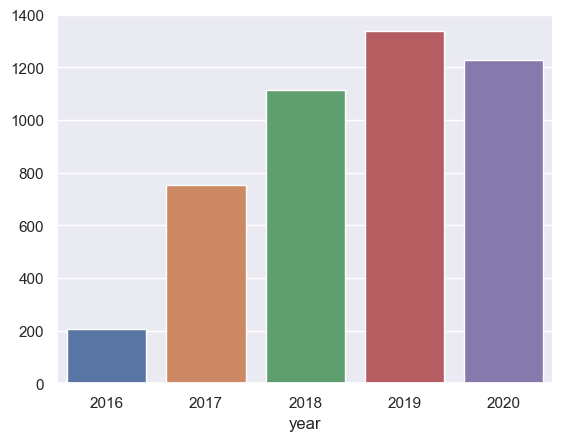

In [63]:
sns.barplot(x = df1.index, y = df1.values)
plt.show()

# Q3: How many TV Shows and Movies are in dataset ?

In [68]:
df2 = df['Category'].value_counts()
df2

Category
Movie      4673
TV Show     136
Name: count, dtype: int64

<Axes: ylabel='Category'>

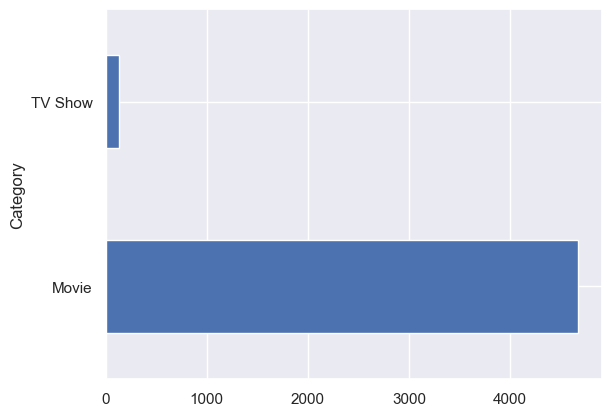

In [77]:
df2.plot(kind = 'barh')


# Q4. Show all the movies released in year 2017 .

In [85]:
df[(df['year']==2017) & (df['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15,2017
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,20-Oct-17,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017
40,s41,Movie,Çarsi Pazar,Muharrem Gülmez,"Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem G...",Turkey,10-Mar-17,TV-14,97 min,"Comedies, International Movies",The slacker owner of a public bath house ralli...,2017-03-10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,31-Dec-17,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017
7726,s7725,Movie,You Can’t Fight Christmas,Kenny Young,"Brely Evans, Andra Fuller, Persia White, Porsc...",United States,19-Dec-17,TV-PG,85 min,"Comedies, Romantic Movies",After stepping in to revitalize his family's h...,2017-12-19,2017
7731,s7730,Movie,You Get Me,Brent Bonacorso,"Bella Thorne, Halston Sage, Taylor John Smith,...",United States,23-Jun-17,TV-MA,89 min,"Dramas, Thrillers","After a one-night stand, Holly develops a dang...",2017-06-23,2017
7763,s7762,Movie,Zapped,Peter DeLuise,"Zendaya, Chanelle Peloso, Spencer Boldman, Emi...","Canada, United States",1-Feb-17,TV-Y,92 min,"Children & Family Movies, Comedies",A girl discovers a dog-training app that can g...,2017-02-01,2017


# Q5: Show only the Titles of all TV shows that released in India

In [91]:
df[(df['Country']=='India') & (df['Category']=='TV Show')][['Show_Id','Title']]

,Show_Id,Title
132,s133,7 (Seven)
2406,s2407,GHOUL
3119,s3120,Jamtara - Sabka Number Ayega
4724,s4725,Paava Kadhaigal
6037,s6037,Th Eena Meena Deeka Chase Comedy Show


# Q6: Sho top 10 directory who ghave most no of TV shows and Movies to netflix.

In [95]:
df['Director'].value_counts().sort_values(ascending = False).head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: count, dtype: int64

# Q7: Show the record where Its a Comedy Movie or its from United Kingdom

In [97]:
df[(df['Category']== 'Movie') & (df['Type']=='Comedies') | (df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,1-Jan-21,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,20-Dec-18,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,16-Apr-19,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,1-May-18,TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018-05-01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,s7614,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,1-Feb-19,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...,2019-02-01,2019
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States",13-May-17,PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017-05-13,2017
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,10-May-19,R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10,2019
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,7-Aug-20,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020-08-07,2020


# Q8: Show the the records where Tom cruise in in cast

In [103]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,1-Jan-20,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,1-Jul-19,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019


# Q9: What are the different ratings by Netflix ?

In [113]:
df3 = df['Rating'].value_counts()

In [114]:
df3.index

Index(['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'PG', 'TV-G', 'TV-Y', 'TV-Y7',
       'NR', 'G', 'UR', 'TV-Y7-FV', 'NC-17'],
      dtype='object', name='Rating')

# Q10: How many movies got 'R' rating after 2018 ?

In [124]:
df[(df['year'] > 2018)&(df['Rating']=='R')&(df['Category'] == 'Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1-Nov-19,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,19-Mar-20,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,13-Jan-19,R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019-01-13,2019
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore",3-Apr-19,R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019-04-03,2019
83,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,28-Jun-19,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019-06-28,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,s7658,Movie,Woodshock,"Kate Mulleavy, Laura Mulleavy","Kirsten Dunst, Joe Cole, Pilou Asbæk, Jack Kil...",United States,21-Jun-20,R,101 min,"Dramas, Independent Movies, Thrillers","Shattered after her mother's death, a woman fl...",2020-06-21,2020
7712,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,22-Oct-20,R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020-10-22,2020
7738,s7737,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,20-Nov-19,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019-11-20,2019
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019


# Q11 : Which show has the longest duration ?

In [138]:
# Splitting the duration column to split the unit
df[['Duration_Total', 'Unit']] = df['Duration'].str.split(' ', expand = True)
df['Duration_Total'] = df['Duration_Total'].astype(int)

In [139]:
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year,Duration_Total,Unit
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,123,min
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019,88,min
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,1-Jul-18,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018-07-01,2018,94,min
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020,88,min
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",19-Oct-20,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020,99,min


In [146]:
df4 = df[df['Unit']== 'min']
df4.sort_values(by = 'Duration_Total', ascending  = False).head(3)[['Show_Id','Title','Duration_Total','Unit']]

,Show_Id,Title,Duration_Total,Unit
6852,s6851,The School of Mischief,253,min
4490,s4491,No Longer kids,237,min
5377,s5377,Sangam,228,min


# Q12 : Which Country has the highest no of TV show?

In [150]:
df5 = df[df['Category']=='TV Show']
df5.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year,Duration_Total,Unit
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,1,Season
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,30-Jul-19,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30,2019,1,Season
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,11-Nov-20,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...,2020-11-11,2020,1,Season
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,9-Mar-18,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...,2018-03-09,2018,1,Season
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",1-Jul-20,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020,1,Season


In [154]:
df5['Country'].value_counts().sort_values(ascending = False).head(3)

Country
United States     27
United Kingdom    19
Japan             10
Name: count, dtype: int64

# Q13: Show the records sorted by Year

In [155]:
df.sort_values(by = 'year', ascending = False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,year,Duration_Total,Unit
2269,s2270,Movie,Fred Claus,David Dobkin,"Vince Vaughn, Paul Giamatti, John Michael Higg...",United States,1-Jan-21,PG,115 min,"Children & Family Movies, Comedies",The holiday season is ruined for Santa Claus w...,2021-01-01,2021,115,min
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,8-Jan-21,TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021,148,min
6248,s6248,Movie,The Creative Brain,"Jennifer Beamish, Toby Trackman",David Eagleman,United States,1-Jan-21,TV-14,53 min,Documentaries,Neuroscientist David Eagleman taps into the cr...,2021-01-01,2021,53,min
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",16-Jan-21,R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",2021-01-16,2021,94,min
7147,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,6-Jan-21,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...,2021-01-06,2021,99,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",17-May-11,TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,2011-05-17,2011,103,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1-Nov-10,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010,84,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,5-May-09,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,18-Nov-09,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009,29,min
